# Check the error of central differencing and upwind differencing, for 1D constant advection equation

In [91]:
import numpy as np
import matplotlib.pyplot as plt


In [92]:
'''
Define the experimental parameters
'''
# Define the domain
a = 0
b = 1


# Define the mesh grid
N = 1000
x_grid = np.linspace(a, b, N+1)
dx = x_grid[1] - x_grid[0]

# Define the advection speed
c = 1

# Define the time step
dt = 0.2 * dx

# Define the total time
T = 0.5

In [93]:
print("dt is ", dt)

dt is  0.0002


In [94]:
'''
Initial condition
'''

def initial_condition(x):
    u_initial = np.zeros(len(x))
    for i in range(len(x)):
        if x[i] <= 0.4 and x[i] >= 0.2:
            u_initial[i] = 1
        else:
            u_initial[i] = 0
    return u_initial

# Central difference experiment

In [95]:
# Define the u evolution and the time evolution
u_total_central = [initial_condition(x_grid)]
t_total_central = np.linspace(0, T, int(T/dt)+1)

In [96]:
'''
Central difference experiment
'''
for t in t_total_central:
    u_previous = u_total_central[-1]
    u_new = np.zeros(len(x_grid))

    # Update the interior points using central difference
    u_derivative = (-u_previous[:-2] + u_previous[2:]) / (2 * dx)
    u_new[1:-1] = u_previous[1:-1] - c * dt * u_derivative

    # Update the boundary points using periodic boundary condition
    u_new[0] = u_previous[0] - c * dt * (u_previous[1] - u_previous[-2]) / (2 * dx)
    u_new[-1] = u_new[0]

    u_total_central.append(u_new)


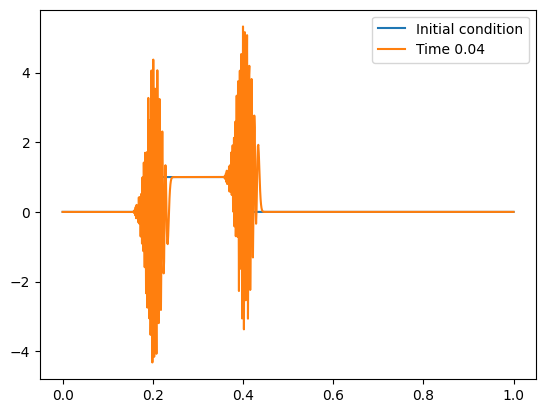

Plotted time is 0.04


In [ ]:
plt.plot(x_grid, u_total_central[0])

idx_testing = 200
plt.plot(x_grid, u_total_central[idx_testing])
plt.legend(['Initial condition', 'Time ' + str(round(t_total_central[idx_testing], 2))])
plt.show()

print("Plotted time is " + str(round(t_total_central[idx_testing], 2)))

# Upwind difference experiment

In [99]:
# Define the u evolution and the time evolution
u_total_upwind = [initial_condition(x_grid)]
t_total_upwind = np.linspace(0, T, int(T/dt)+1)

In [100]:
'''
Central difference experiment
'''
for t in t_total_upwind:
    u_previous = u_total_upwind[-1]
    u_new = np.zeros(len(x_grid))

    # Update the interior points using central difference
    u_derivative = (-u_previous[:-1] + u_previous[1:]) / (dx)
    u_new[1:] = u_previous[1:] - c * dt * u_derivative

    # Update the boundary points using periodic boundary condition
    u_new[0] = u_previous[0] - c * dt * (u_previous[0] - u_previous[-1]) / (dx)

    u_total_upwind.append(u_new)


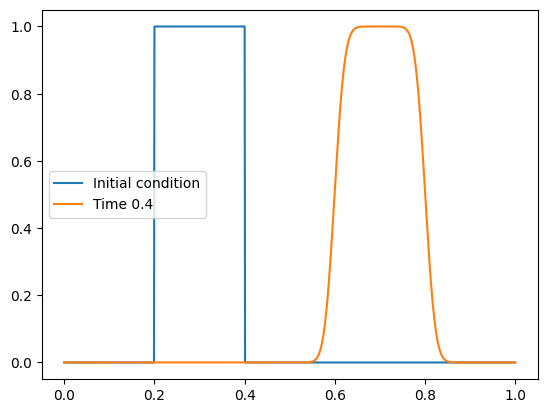

Plotted time is 0.4


In [102]:
plt.plot(x_grid, u_total_upwind[0])

idx_testing = 2000
plt.plot(x_grid, u_total_upwind[idx_testing])
plt.legend(['Initial condition', 'Time ' + str(round(t_total_upwind[idx_testing], 2))])
plt.show()

print("Plotted time is " + str(round(t_total_upwind[idx_testing], 2)))

<!-- DSAFA -->